# Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1] Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.


In [2]:
df=pd.read_csv("dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


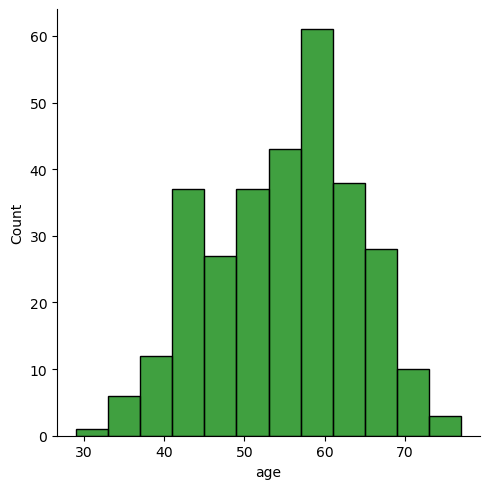

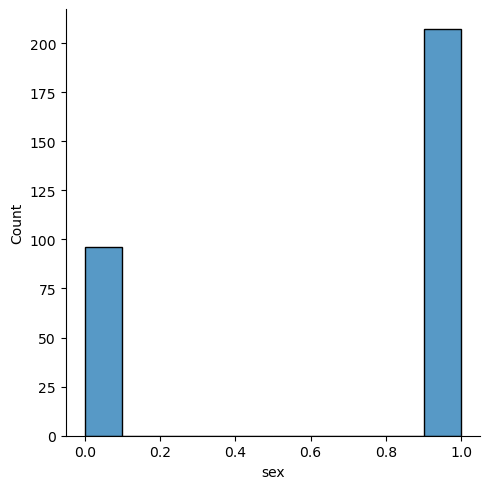

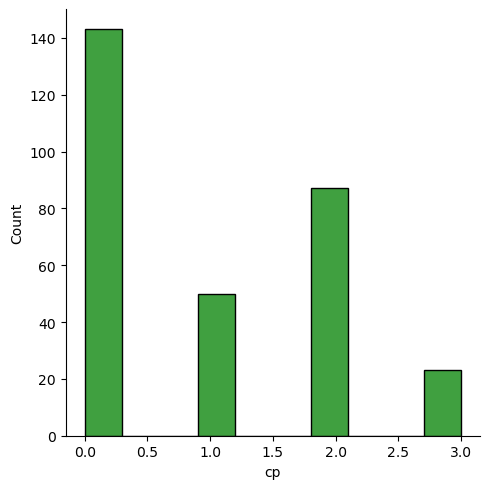

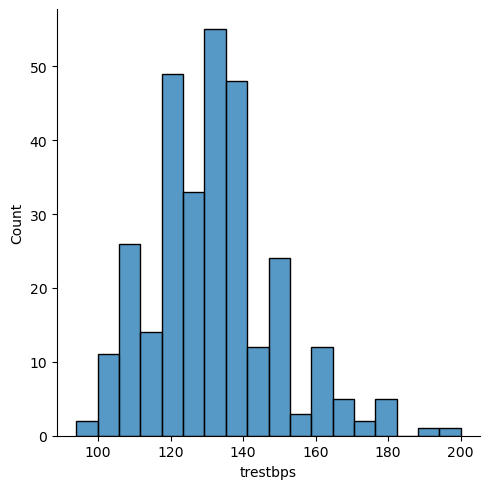

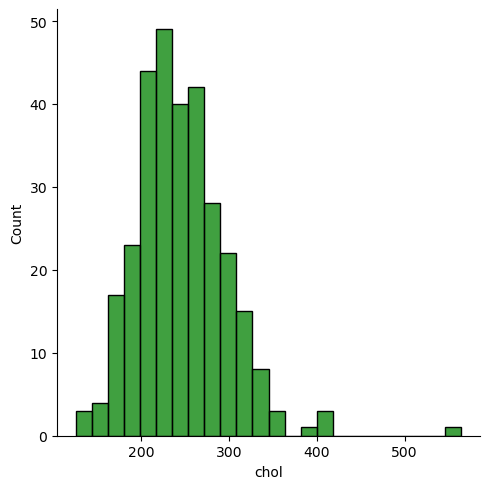

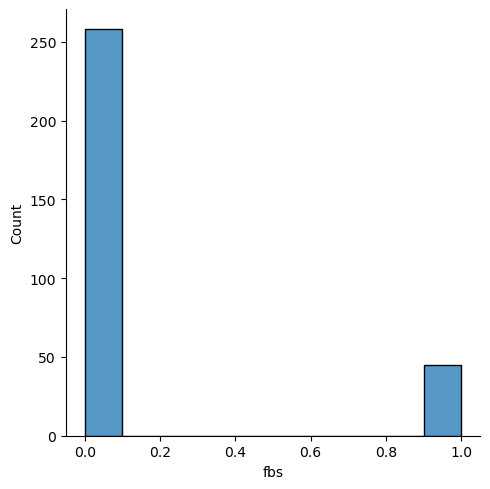

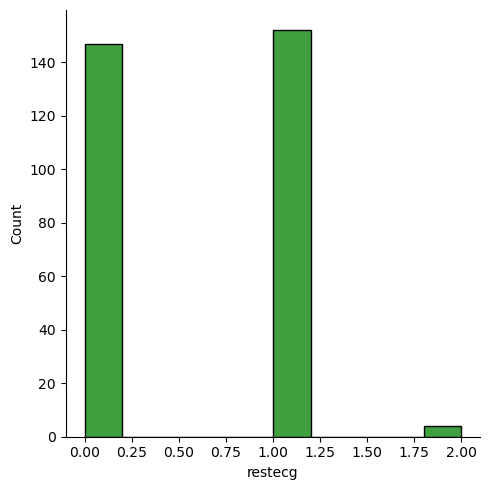

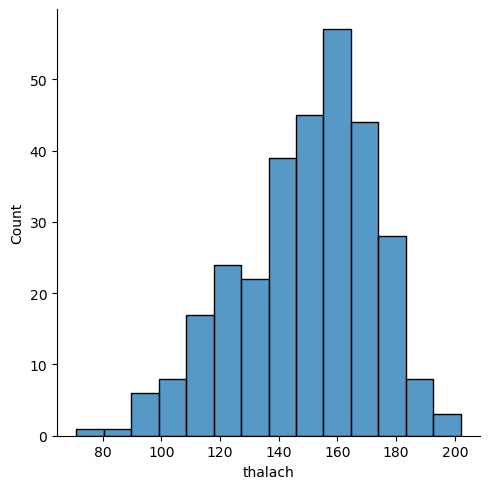

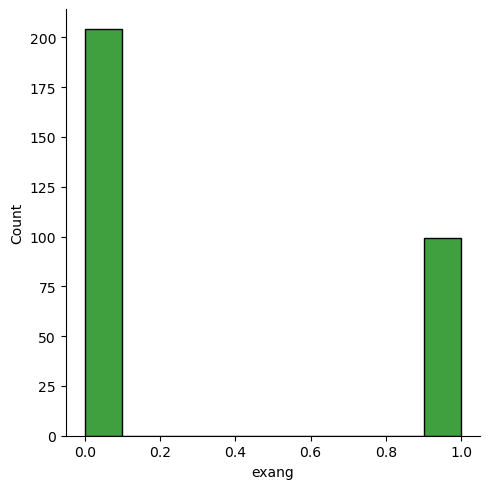

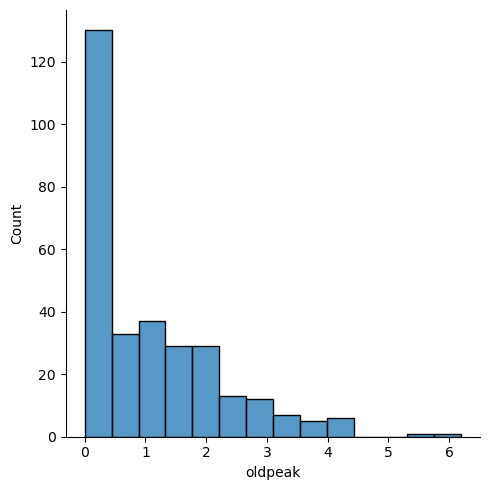

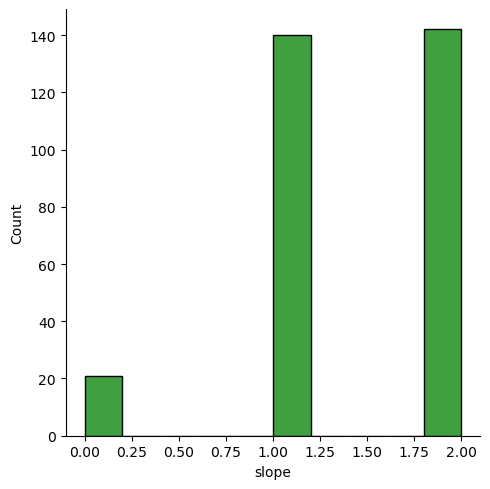

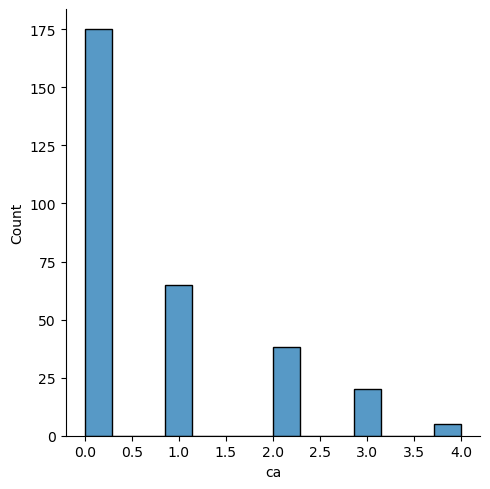

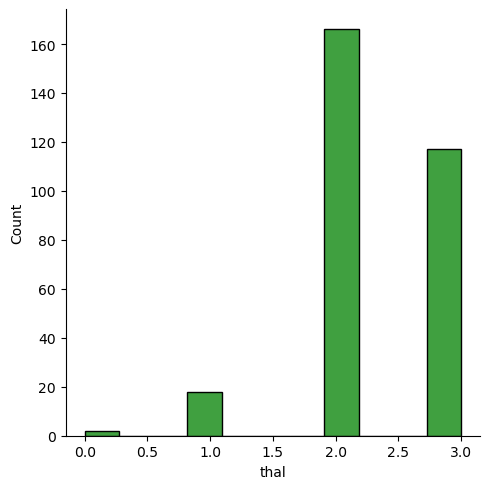

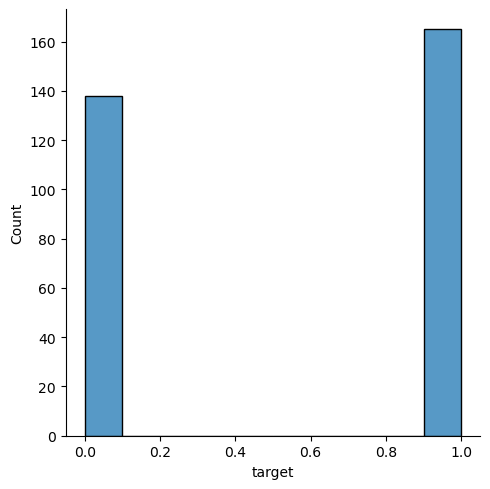

In [5]:
x=0
for i in df.columns:
    if x%2==0:
        sns.displot(df[i],kind="hist",color="green")
    else:
        sns.displot(df[i],kind="hist")
    x=x+1

<AxesSubplot: >

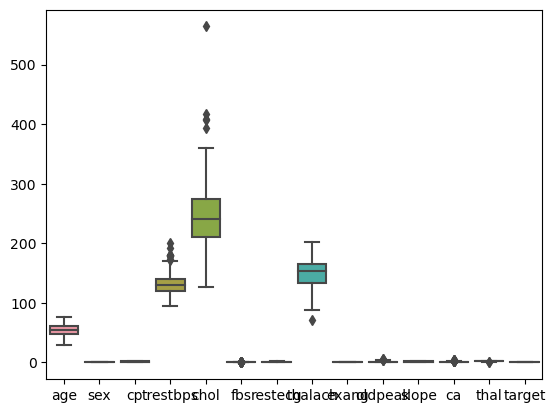

In [6]:
sns.boxplot(df)

In [7]:
def remove_outliers_iqr(data_column, whisker_width=1.5):
    quartile_1, quartile_3 = np.percentile(data_column, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (whisker_width * iqr)
    upper_bound = quartile_3 + (whisker_width * iqr)
    filtered_data = data_column[(data_column >= lower_bound) & (data_column <= upper_bound)]
    return filtered_data

In [8]:
df["chol"]=remove_outliers_iqr(df["chol"])
df["trestbps"]=remove_outliers_iqr(df["trestbps"])
df["thalach"]=remove_outliers_iqr(df["thalach"])

In [9]:
from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()

In [10]:
def selective_min_max_scaling(df, columns_to_scale):
    # Create a copy of the DataFrame to avoid modifying the original data
    scaled_df = df.copy()
    
    # Apply Min-Max scaling to the specified columns
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(scaled_df[columns_to_scale])
    
    # Replace the original values with the scaled values
    scaled_df[columns_to_scale] = scaled_values
    
    return scaled_df

# List of columns to scale (selectively)
columns_to_scale = ['chol', 'trestbps','thalach','age']

# Apply selective scaling
scaled_df = selective_min_max_scaling(df, columns_to_scale)
scaled_df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.671053,0.457265,1,0,0.543860,0,2.3,0,0,1,1
1,0.166667,1,2,0.473684,0.529915,0,1,0.868421,0,3.5,0,0,2,1
2,0.250000,0,1,0.473684,0.333333,0,0,0.736842,0,1.4,2,0,2,1
3,0.562500,1,1,0.342105,0.470085,0,1,0.789474,0,0.8,2,0,2,1
4,0.583333,0,0,0.342105,0.974359,0,1,0.657895,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.605263,0.491453,0,1,0.307018,1,0.2,1,0,3,0
299,0.333333,1,3,0.210526,0.589744,0,1,0.385965,0,1.2,1,0,3,0
300,0.812500,1,0,0.657895,0.286325,1,1,0.464912,0,3.4,1,2,3,0
301,0.583333,1,0,0.473684,0.021368,0,1,0.236842,1,1.2,1,1,3,0


<AxesSubplot: >

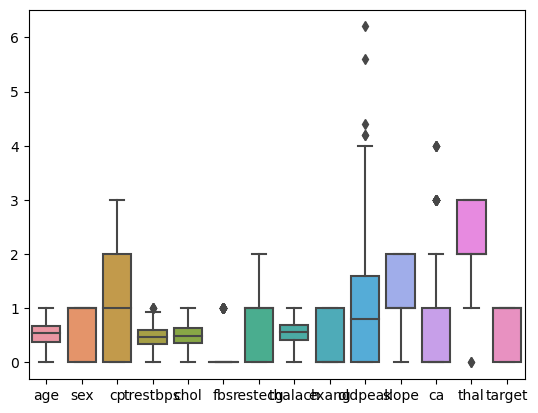

In [11]:
sns.boxplot(scaled_df)

In [12]:
scaled_df["oldpeak"]=remove_outliers_iqr(scaled_df["oldpeak"])
scaled_df["ca"]=remove_outliers_iqr(scaled_df["ca"])

In [13]:
scaled_df["chol"]=scaled_df["chol"].fillna(scaled_df["chol"].median())

In [14]:
scaled_df["trestbps"].isna().value_counts()

False    294
True       9
Name: trestbps, dtype: int64

In [15]:
scaled_df["thalach"]=scaled_df["thalach"].fillna(scaled_df["thalach"].median())
scaled_df["ca"]=scaled_df["ca"].fillna(scaled_df["ca"].mode().iloc[0])
scaled_df["oldpeak"]=scaled_df["oldpeak"].fillna(scaled_df["oldpeak"].median())

In [16]:
scaled_df["trestbps"]=scaled_df["trestbps"].fillna(scaled_df["trestbps"].median())
scaled_df["trestbps"].isna().value_counts()

False    303
Name: trestbps, dtype: int64

In [17]:
scaled_df["chol"].isna().value_counts()

False    303
Name: chol, dtype: int64

In [18]:
scaled_df.isna().value_counts()

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64

# 2] Split the dataset into a training set (70%) and a test set (30%).


In [19]:
X=scaled_df.drop(columns=["target"],axis=1)
y=scaled_df["target"]

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=29)

# 3] Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.


In [21]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_depth=10)

In [22]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [23]:
y_pred=clf.predict(X_test)

# 4] Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.


In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.85      0.89      0.87        46

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# 5] Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.


In [26]:
feature_importances = clf.feature_importances_

# Step 5: Selecting Top Features
# Create a DataFrame to store feature importance values along with their names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features in descending order based on their importance
top_5_features = feature_importance_df.nlargest(5, 'Importance')
selected_features=top_5_features["Feature"]


In [27]:
selected_features.values

array(['cp', 'thalach', 'oldpeak', 'age', 'chol'], dtype=object)

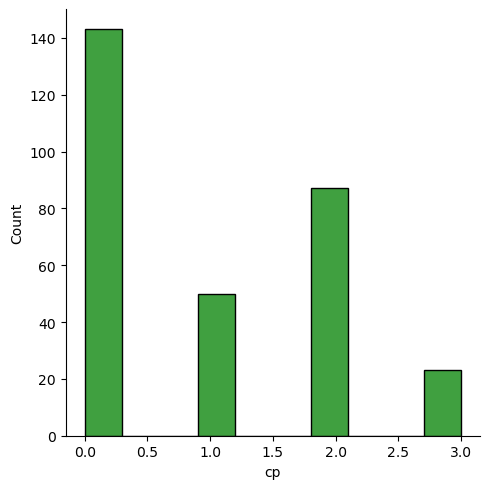

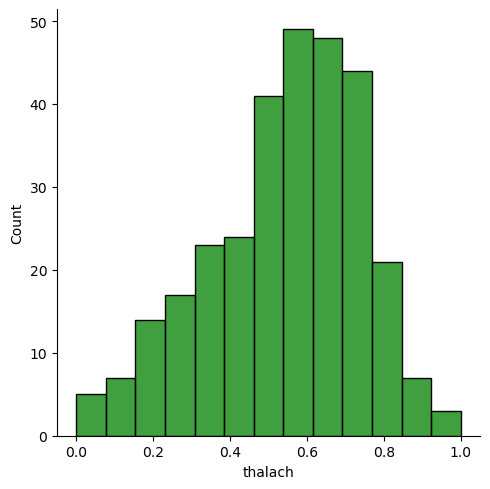

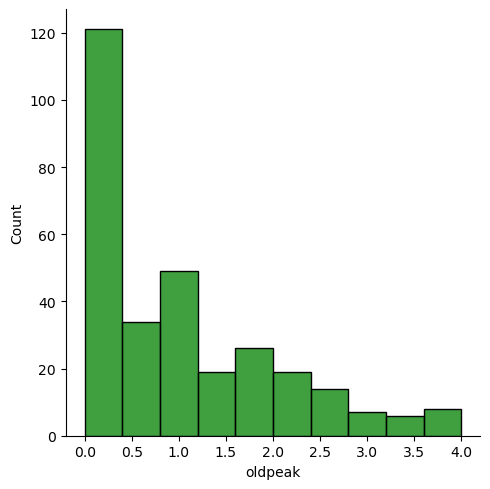

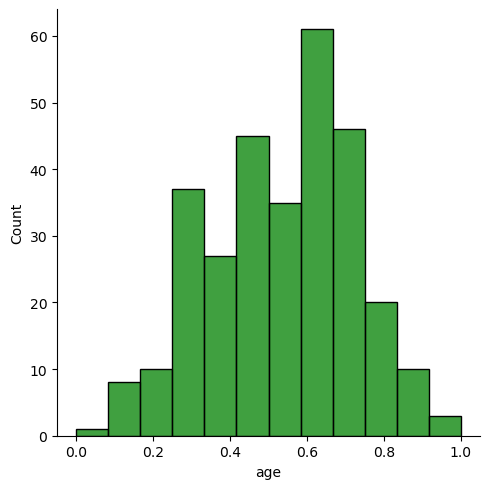

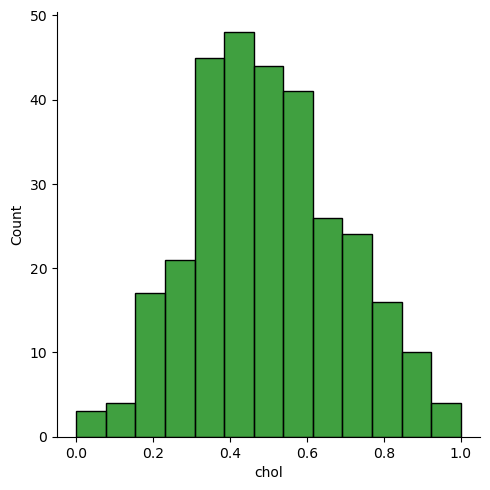

In [28]:
for i in selected_features.values:
    sns.displot(scaled_df[i],color="green")

# 6] Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


In [29]:
parameter={
    "n_estimators":[50,100,200],
    "max_depth":[10,20],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2]
}

In [30]:
from sklearn.model_selection import GridSearchCV
cv=GridSearchCV(clf,parameter,cv=5,verbose=3)

In [31]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.791 total time=   0.1s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.744 total time=   0.1s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.738 total time=   0.1s
[CV 4/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.762 total time=   0.1s
[CV 5/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.833 total time=   0.1s
[CV 1/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.2s
[CV 2/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.791 total time=   0.2s
[CV 3/5] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.2s

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             verbose=3)

In [32]:
y_pred_cv=cv.predict(X_test)

# 7] Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.


In [33]:
cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 200}

In [34]:
print(classification_report(y_test,y_pred_cv))  #with hyperparameter

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        45
           1       0.84      0.91      0.87        46

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [35]:
print(classification_report(y_test,y_pred))     #default model

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        45
           1       0.85      0.89      0.87        46

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



# 8] Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [36]:
feature_importances = clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features in descending order based on their importance
top_2_features = feature_importance_df.nlargest(2, 'Importance')
selected_features = top_2_features["Feature"].values
X_train_two_features = X_train[selected_features]
X_test_two_features = X_test[selected_features]

In [37]:


# Train a new random forest classifier using only the two most important features
clf_two_features = RandomForestClassifier(random_state=42)
clf_two_features.fit(X_train_two_features, y_train)



RandomForestClassifier(random_state=42)

In [39]:
# Generate decision boundaries on the two most important features
x_min, x_max = X_test_two_features.iloc[:, 0].min() - 1, X_test_two_features.iloc[:, 0].max() + 1
y_min, y_max = X_test_two_features.iloc[:, 1].min() - 1, X_test_two_features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = clf_two_features.predict(grid_points)
Z = Z.reshape(xx.shape)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


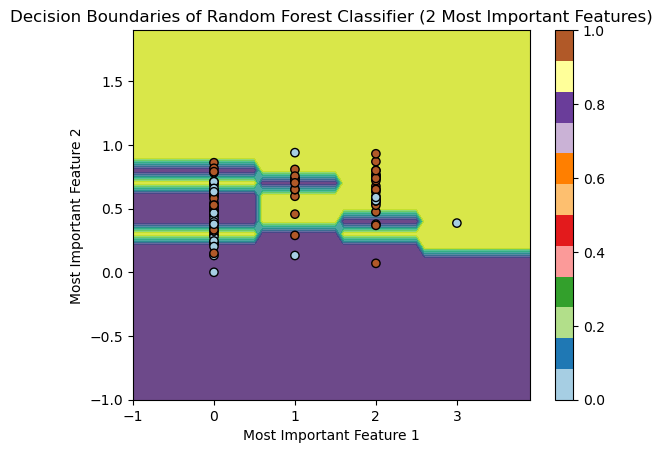

In [40]:
# Plot the decision boundaries on a scatter plot
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test_two_features.iloc[:, 0], X_test_two_features.iloc[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Most Important Feature 1 - cp')
plt.ylabel('Most Important Feature 2 - thalach')
plt.title('Decision Boundaries of Random Forest Classifier (2 Most Important Features)')
plt.colorbar()
plt.show()